## <font color='grey'>Unhomework 1</font>
### Question:
A linear model with $\boldsymbol{\theta}=(a,b)^T$ parametrization $f(x;\boldsymbol{\theta}) = a +b\,x$

$\displaystyle \hat{\boldsymbol\theta} = \arg\min \sum_i \big[y_i-(a + b\,x_i)\big]^2$

Derive the best fit parameters of $(a,b)$

### Answer: ( There are two ways to solve this question )
<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
### <font color='blue'>First solution</font>
Let 
\begin{eqnarray}
        \theta = \sum_i \big[y_i-(a + b x_i)\big]^2
\end{eqnarray}
take derivatives with resepect to $a$ and $b$, and set them to be $0$, we have
  \begin{eqnarray}
        \frac{\partial \theta}{\partial a} &=& -2 \sum_i (y_i-(a+b x_i)) = 0 \\
        \frac{\partial \theta}{\partial b} &=& -2 \sum_i x_i(y_i-(a+b x_i)) = 0
   \end{eqnarray}
which is eqaul to 
    \begin{eqnarray}
        \sum_i y_i &=& aN + b \sum_i x_i \\ 
        \sum_i x_i y_i &=& a\sum_i x_i + b \sum_i x_i^2
   \end{eqnarray}
By solving the above two equations, we can obtain
    \begin{eqnarray}
        \hat{a} &=& \bar{y} - \hat{b}\bar{x} \\
        \hat{b} &=& \frac{\sum_i(x_i - \bar{x})(y_i - \bar{y})}{\sum_i(x_i - \bar{x})^2} 
        = \frac{N\sum_i x_i y_i - (\sum_i x_i)(\sum_i y_i)}{N\sum_i x_i^2 - (\sum_i x_i)^2}
   \end{eqnarray}
where $\bar{x}=\frac{1}{N}\sum_i x_i$ and $\bar{y}=\frac{1}{N}\sum_i y_i$.



<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<

### <font color='blue'>Second solution</font>

Find $\hat{\beta} = [\hat{a}, \hat{b}]^T$ minimize 
 \begin{eqnarray}
     \theta &=& \sum_i \big[y_i-(a + b x_i)\big]^2 \\
     &=& (y - X\beta)^T(y - X\beta) \\
     &=& y^T y - y^T X\beta - \beta^T X^T y + \beta^T X^T X\beta
 \end{eqnarray}

Similarly, computing the partial derivatives of $\theta$ with respect to $\beta$ and setting it to $0$ gives
 \begin{eqnarray}
     \frac{\partial \theta}{\partial \beta} = -2X^T y + 2 X^T X\beta = 0 
 \end{eqnarray}
 and thus $\hat{\beta} = (X^T X)^{-1}X^T y$.



## <font color='grey'>Unhomework 2
    
### Question:
(1) Fit a 3rd order polynomial to the same data
    
(2) Fit $f(x;\beta_0,\beta_1) = \beta_0\sin(x) + \beta_1\cos(x)$

(3) Evaluate the best fits on a grid of 1000 equally-spaced points in $[-1,4]$

(4) Plot them in one figure </font>

In [2]:
%matplotlib inline
%pylab inline 

Populating the interactive namespace from numpy and matplotlib


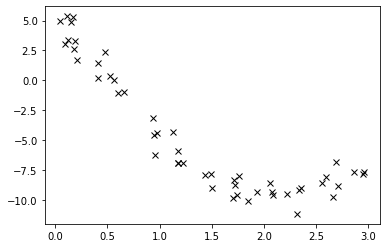

In [4]:
# same data from class note
x = 3 * random.rand(50) # between 0 and 3
e = 1 * random.randn(x.size) # noise
y = 10*cos(x+1) + e;  plot(x,y,'kx');

In [5]:
# 1. Fit a 3rd order polynomial to the same data: 
# f(x) = b0 + b1 x + b2 * x^2 + b3 * x^3
X = ones((x.size,4));
X[:,1] = x
X[:,2] = x**2
X[:,3] = x**3
X.shape

(50, 4)

array([  5.78452212, -12.59237529,   1.79356119,   0.33458981])

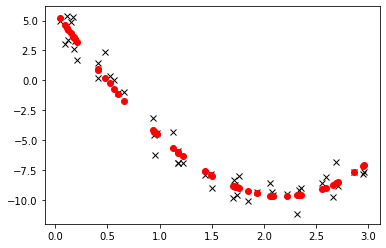

In [6]:
Xpinv = dot(inv(dot(X.T,X)),X.T)     
bHat1 = dot(Xpinv,y)
yHat1 = dot(X,bHat1)
plot(x,y,'kx'); plot(x,yHat1,'ro'); bHat1

array([-8.51348794,  5.09386006])

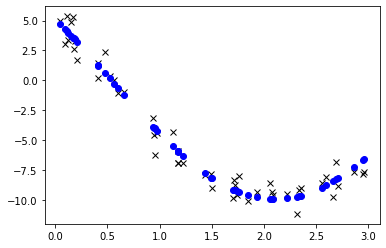

In [7]:
# 2. Fit f(x, beta0, beta1) = beta0 sin(x) + beta1 cos(x) 
X = ones((x.size,2)); 
X[:,0] = sin(x)
X[:,1] = cos(x)
Xpinv = dot(inv(dot(X.T,X)),X.T)     
bHat2 = dot(Xpinv,y)
yHat2 = dot(X,bHat2)
plot(x,y,'kx'); plot(x,yHat2,'bo'); bHat2

In [8]:
# 3. Evaluate on a grid of 1000 equally-spaced points in [−1,4]
x_1000 = np.linspace(-1,4,1000)

X1_1000 = ones((x_1000.size, 4))
X1_1000[:,1] = x_1000
X1_1000[:,2] = x_1000**2
X1_1000[:,3] = x_1000**3 # 3rd order polynomial

X2_1000 = ones((x_1000.size, 2))
X2_1000[:,0] = sin(x_1000)
X2_1000[:,1] = cos(x_1000) # Fit f(x, beta0, beta1) = beta0 sin(x) + beta1 cos(x) 

yHat1_1000 = dot(X1_1000, bHat1)
yHat2_1000 = dot(X2_1000, bHat2)

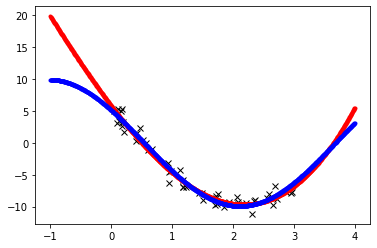

In [14]:
# 4. Plot them in one figure
plot(x,y,'kx'); 
plot(x_1000,yHat1_1000,'r.')
plot(x_1000,yHat2_1000,'b.')

## <font color='darkgreen'>Excercise - Application of PCA </font>

- **Singular-value decomposition**
> The generalization of the eigendecomposition 
>
> For example, a symmetric $ n \times n $ matrix with positive eigenvalues to any $ n \times m $ matrix
>
> $ X_{n \times m} = U W V^T$
- $ U_{n \times n} $, $ U^TU=I $
- $ W_{n \times m} $, diagonal
- $ V_{m \times m} $, $ V^TV=I $

- Data matrix 
> $ X = (x_{ij})_{n \times m} $


- Centering
> $X_{new} = X - mean(X)$

- Decomposition
> Original data matrix 
 - $ X_{new} = U W V^T$
>
> Sample covariance matrix 
 - $ C = \frac{1}{n\!-\!1}\ X_{new} X_{new}^T = \frac{1}{n\!-\!1}\  \sum_i x_i x_i^T $
 - $ C = E \Lambda E^T $
>
> Hence
 - $ C = \frac{1}{n\!-\!1}\  UWV^T\ VWU^T = \frac{1}{n\!-\!1}\ U W^2 U^T = E \Lambda E^T $
 - $ E = U $
 - $ \Lambda = \frac{1}{n\!-\!1}\  W^2$

- Choose first $k$ components

- A truncated set of eigenvectors $E_K$ defines a transformation that reduces the dimensionality while preserving the most variance possible



> $\displaystyle  Z_K = E_K^T\, X $

> and

> $\displaystyle  X_K = E_K Z_K = E_K E_K^T\, X = P_K\,X $



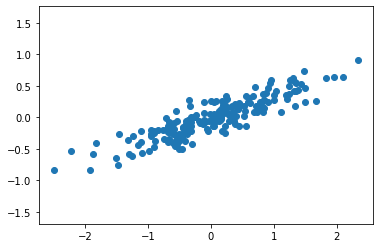

In [17]:
# create nearly linear relationship between the x and y variables
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal');

In [20]:
# using scikit-learn's PCA estimator
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [21]:
# get the direction of the vector
print(pca.components_)

[[-0.94446029 -0.32862557]
 [-0.32862557  0.94446029]]


In [22]:
# get the squared-length of the vector
print(pca.explained_variance_)

[0.7625315 0.0184779]


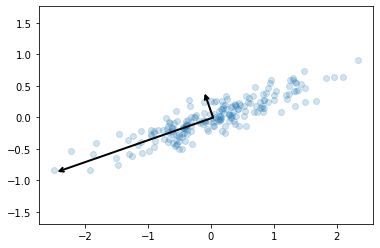

In [24]:
# create a function to draw the vector of direction
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

# plot data
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal');

These vectors represent the principal axes of the data, and the length of the vector is an indication of how "important" that axis is in describing the distribution of the data—more precisely, it is a measure of the variance of the data when projected onto that axis. The projection of each data point onto the principal axes are the "principal components" of the data.